## Gaussian Error Propigation and Standard Errors

In [1]:
from pathlib import Path
sys.path.append(str(Path().resolve().parent / 'Scripts'))
from packages import *
import colors

In [2]:
import read_mcw
df = read_mcw.read_and_process()
df['Site_ID'].unique()

array(['BC', 'MC', 'RC_01', 'RC_02', 'RC_03', 'RC_04', 'RC_05', 'RC_06',
       'RC_07', 'RC_08', 'RC_09', 'RC_10', 'IB_01', 'IB_02', 'IB_08',
       'IB_09', 'IB_10', 'IB_07', 'IB_03', 'IB_04', 'IB_05', 'IB_06'],
      dtype=object)

In [3]:
# MCW Weighted Isotope Values D18O
RC_01 = -9.7155
RC_02 = -14.01384
RC_03 = -14.16618
RC_04 = -11.6961
RC_05 = -11.9838
RC_06 = -13.16526
RC_07 = -11.43958
RC_08 = -13.836019
RC_09 = -14.4588
RC_10 = -14.140187
IB_01 = -18.84741
IB_02 = -18.280612
IB_03 = -19.237479
IB_04 = -19.55665
IB_05 = -20.859719
IB_06 = -19.51508
IB_07 = -20.27681
IB_08 = -18.035748
IB_09 = -18.379337
IB_10 = -19.17537

#Water Year 23 Precip total at each site (mm)
r1_sum = 334.32
r2_sum = 328.422199
r3_sum = 298.616493
r4_sum = 367.6122
r5_sum = 262.759259
r6_sum = 482.840065
r7_sum = 269.239056
r8_sum = 568.247197
r9_sum = 424.304921
r10_sum = 472.136001

s1_sum = 168.586419
s2_sum = 260.923149
s3_sum = 224.600441
s4_sum = 322.325984
s5_sum = 832.765625
s6_sum = 624.480625
s7_sum = 875.439823
s8_sum = 615.160983
s9_sum = 773.38994
s10_sum = 857.194671

In [4]:
ff = pd.read_csv('../Data/12.prcp_Accum_RC_IB.csv', parse_dates=[0])
ff.head(4)

,Collection_Date,Site_ID,Precip_Accum
0,2022-10-27,RC_01,16.355125
1,2022-11-13,RC_01,48.301849
2,2023-03-16,RC_01,46.199951
3,2023-06-29,RC_01,153.297424


In [5]:
df['Collection_Date'] = pd.to_datetime(df['Collection_Date'])
ff['Collection_Date'] = pd.to_datetime(ff['Collection_Date'])

# merged datasets
df = pd.merge(df, ff, on=['Collection_Date', 'Site_ID'], how='outer')
df.head()

,Sample Name,Site_ID,Collection_Date,D_2H,D_2H_StDev,D_18O,D_18O_StDev,Type,Site_no,D_18O_Rain,...,D_18O_MC,D_18O_BC,D_2H_Rain,D_2H_Snow,D_18O_std_Rain,D_18O_std_Snow,D_18O_StDev_Precip,D_18O_Precip,D_2H_Precip,Precip_Accum
0,1,BC,2022-10-05,-126.803089,0.905,-16.459499,0.1660,BC,NaN,NaN,...,NaN,-16.459499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,MC,2022-10-05,-121.245698,0.503,-16.055768,0.0923,MC,NaN,NaN,...,-16.055768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,BC,2022-10-27,-124.454618,0.553,-16.515137,0.1370,BC,NaN,NaN,...,NaN,-16.515137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,MC,2022-10-27,-120.942857,0.834,-15.892233,0.2420,MC,NaN,NaN,...,-15.892233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,RC_01,2022-10-27,-92.796701,1.390,-12.540525,0.2320,RC,1.0,-12.540525,...,NaN,NaN,-92.796701,NaN,0.232,NaN,0.232,-12.540525,-92.796701,16.355125


In [6]:
filtered_01 = df[(df["Site_ID"] == "IB_10")]
#RC01 = (filtered_01['D_18O_Precip'] * filtered_01['Precip_Accum']).sum() / r2_sum

### S3 Equation: Std Error for unweighted
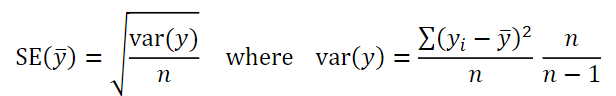

In [7]:
data = df['D_18O_Precip']

# Calculate the mean
mean_y = np.mean(data)

# Calculate the variance using Bessel's correction (ddof=1)
variance_y = np.var(data, ddof=1)

# Calculate the standard error of the mean
n = len(data)
#standard_error = np.sqrt(variance_y / n)

standard_error = np.sqrt(variance_y / n)

print("Mean:", mean_y)
print("Variance:", variance_y)
print("Standard Error of the Mean:", standard_error)
standard_deviation = np.sqrt(variance_y)
print("Standard Deviation:", standard_deviation)

#np.var is the same unweighed equation

Mean: -15.448900385620915
Variance: 19.65117183277072
Standard Error of the Mean: 0.31267718823674273
Standard Deviation: 4.4329642264257805


Weighted average using std error not volume

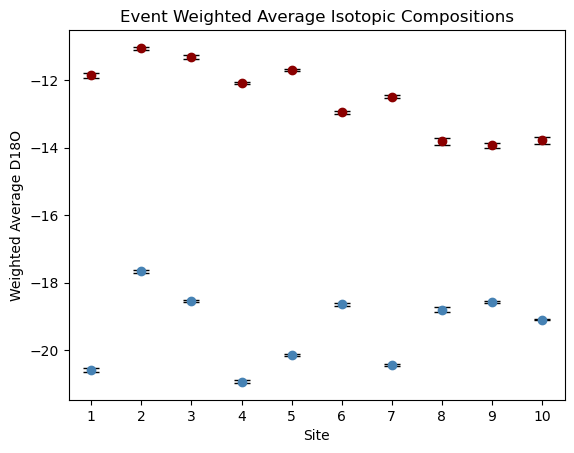

In [8]:
rain = {
    'Group': ['1', '2', '3', '4','5','6',
             '7','8','9','10'],
    'Weighted Average': [-11.85, -11.05, -11.32, -12.08,-11.69,
                       -12.95,-12.48,-13.81, -13.93,-13.78 ],
    'Std Dev': [0.076,0.043,0.060, 0.037,0.031,
               0.034,0.049,0.11,0.085,0.11]
}
rain = pd.DataFrame(rain)

snow = {
    'Group': ['1', '2', '3', '4','5',
              '6','7','8','9','10'],
    'Weighted Average': [-20.59,-17.67,-18.55,-20.94, -20.14,
                        -18.65, -20.44,-18.80, -18.57, -19.11],
    'Std Dev': [0.052,0.050,0.039, 0.039, 0.033,
               0.033, 0.029, 0.060, 0.033, 0.015]
}
snow = pd.DataFrame(snow)

# (std dev not volume)
plt.errorbar(rain['Group'], rain['Weighted Average'], yerr=rain['Std Dev'], fmt='o', color='darkred', ecolor='black', elinewidth=5, capsize=6)
plt.errorbar(snow['Group'], snow['Weighted Average'], yerr=snow['Std Dev'], fmt='o', color='steelblue', ecolor='black', elinewidth=5, capsize=6)
plt.title('Event Weighted Average Isotopic Compositions')
plt.xlabel('Site')
plt.ylabel('Weighted Average D18O');

## Gaussian Error Propigation for Weighted Average
### Equations:
S4 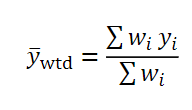  S5 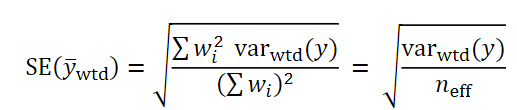 
S6 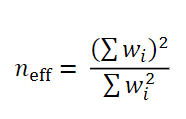

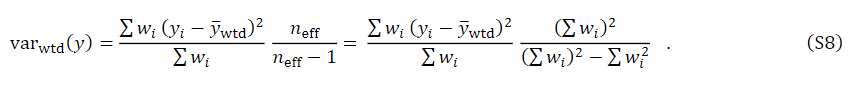

In [9]:
df['D_18O_Rain']
df['D_18O_std_Rain']
df['rain_accum'] = np.where(df['Type'] == 'RC', df['Precip_Accum'], np.nan)


# Calculating SE for each event
df['weighted_mean'] = df['rain_accum'] * df['D_18O_Rain']
df['weighted_variance'] = df['rain_accum'] * (df['D_18O_Rain'] - df['D_18O_Rain'].mean())**2

# Calculate total weights and weighted mean for entire dataset
total_weight = df['rain_accum'].sum()
overall_weighted_mean = df['weighted_mean'].sum() / total_weight

# Applying the individual event SE calculation
df['individual_SE'] = np.sqrt(df['weighted_variance'] / df['rain_accum'])

# Optionally, calculate overall SE if needed
overall_variance = df['weighted_variance'].sum() / (total_weight**2)
n_eff = (total_weight**2) / df['rain_accum'].sum()
overall_SE = np.sqrt(overall_variance / n_eff)

print(df[['D_18O_Rain', 'individual_SE']])
print("Overall SE:", overall_SE)

     D_18O_Rain  individual_SE
0           NaN            NaN
1           NaN            NaN
2           NaN            NaN
3           NaN            NaN
4    -12.540525       0.617514
..          ...            ...
196         NaN            NaN
197         NaN            NaN
198  -12.729516       0.806505
199  -13.009671       1.086660
200  -12.450373       0.527362

[201 rows x 2 columns]
Overall SE: 0.000877636805122995


In [10]:
df['D_18O_Snow']
df['D_18O_std_Snow']
df['snow_accum'] = np.where(df['Type'] == 'IB', df['Precip_Accum'], np.nan)


# Calculating SE for each event
df['weighted_mean'] = df['snow_accum'] * df['D_18O_Snow']
df['weighted_variance'] = df['snow_accum'] * (df['D_18O_Snow'] - df['D_18O_Snow'].mean())**2

# Calculate total weights and weighted mean for entire dataset
total_weight = df['snow_accum'].sum()
overall_weighted_mean = df['weighted_mean'].sum() / total_weight

# Applying the individual event SE calculation
df['individual_SE'] = np.sqrt(df['weighted_variance'] / df['snow_accum'])

# Optionally, calculate overall SE if needed
overall_variance = df['weighted_variance'].sum() / (total_weight**2)
n_eff = (total_weight**2) / df['snow_accum'].sum()
overall_SE = np.sqrt(overall_variance / n_eff)

print(df[['D_18O_Snow', 'individual_SE']][40:60])
print("Overall SE:", overall_SE)

    D_18O_Snow  individual_SE
40         NaN            NaN
41         NaN            NaN
42  -17.305670       1.810155
43  -18.176109       0.939716
44  -17.899088       1.216737
45  -18.108610       1.007215
46  -18.824681       0.291144
47         NaN            NaN
48  -18.286544       0.829281
49  -17.718105       1.397720
50  -17.656088       1.459737
51  -18.052562       1.063263
52  -17.771356       1.344469
53  -17.960485       1.155340
54  -17.910480       1.205345
55  -17.398432       1.717393
56         NaN            NaN
57  -21.392028       2.276203
58  -20.299790       1.183965
59  -20.317365       1.201540
Overall SE: 0.00038497084212535035


In [11]:
y = df['D_18O_Snow']  # isotopic measurements
w = df['snow_accum']  # weights (precipitation volumes mm)

# Calculate weighted average
yw = np.sum(w * y) / np.sum(w)

# Calculate weighted variance
var_w = (np.sum(w * (y - yw) ** 2) / np.sum(w)) * ((np.sum(w)**2)/ ((np.sum(w)**2)-np.sum(w**2)))

# Calculate effective sample size
n_eff = (np.sum(w) ** 2) / np.sum(w ** 2)

# Calculate standard error of the weighted mean
se_yw_snow = np.sqrt(var_w / n_eff)

print("Weighted Mean:", yw)
print("Weighted Variance:", var_w)
print("Effective Sample Size:", n_eff)
print("Standard Error of Weighted Mean:", se_yw_snow)

#weight for each season from am
#s5 weighted variand and neff on each case to get std error: en member signatures

Weighted Mean: -19.375278879570295
Weighted Variance: 4.60875013480004
Effective Sample Size: 44.72503224800969
Standard Error of Weighted Mean: 0.32100829171298645


In [12]:
y = df['D_18O_Rain']  # isotopic measurements
w = df['rain_accum']  # weights (precipitation volumes mm)

# Calculate weighted average
yw = np.sum(w * y) / np.sum(w)

# Calculate weighted variance
var_w = (np.sum(w * (y - yw) ** 2) / np.sum(w)) * ((np.sum(w)**2)/ ((np.sum(w)**2)-np.sum(w**2)))

# Calculate effective sample size
n_eff = (np.sum(w) ** 2) / np.sum(w ** 2)

# Calculate standard error of the weighted mean
se_yw_rain = np.sqrt(var_w / n_eff)

print("Weighted Mean:", yw)
print("Weighted Variance:", var_w)
print("Effective Sample Size:", n_eff)
print("Standard Error of Weighted Mean:", se_yw_rain)

#weight for each season from am
#s5 weighted variand and neff on each case to get std error: en member signatures

Weighted Mean: -13.191884118977041
Weighted Variance: 9.622455042872064
Effective Sample Size: 29.477686579534822
Standard Error of Weighted Mean: 0.5713421265237051


# Streamflow cold vs warm season 
## eq(5) mass weighted std dev

In [13]:
df['MC_Sampling'] = df[df['Type'] == 'MC'][['Collection_Date']]
new_df = df[['MC_Sampling', 'D_18O_MC']].copy()

In [14]:
mc_weight = pd.read_csv('../Data/13.morescreekmassweighting.csv',parse_dates = [0])
mc_weight['MC_Sampling'] = pd.to_datetime(mc_weight['MC_Sampling'], errors='coerce', format='%m/%d/%Y')
new_df['MC_Sampling'] = pd.to_datetime(new_df['MC_Sampling'], errors='coerce')

In [15]:
# Merging mc_weight with new_df for weighted stream samples
merged_df= pd.merge(mc_weight, new_df, on='MC_Sampling', how='left')
merged_df = merged_df.drop_duplicates(subset='datetime', keep='first')
merged_df.head(5)

,datetime,MC_Sampling,MC_Q_event,Mean_Discharge_ft3_sec,D_18O_MC
0,2022-10-01,NaT,NaN,23.3,NaN
176,2022-10-02,NaT,NaN,24.6,NaN
352,2022-10-03,NaT,NaN,24.6,NaN
528,2022-10-04,NaT,NaN,24.8,NaN
704,2022-10-05,2022-10-05,122.4,25.1,-16.055768


### Base Method

In [16]:
#Dates from site 4 - mid elevation most area used in the rest of equations for equation 5 (weighted rain and snow)
df['base_Cold'] = np.where((df['MC_Sampling'] >= '2022-12-18') &
                        (df['MC_Sampling'] < '2023-05-16'), df['D_18O_MC'], np.nan) 
df['base_Warm'] = np.where((df['MC_Sampling']  < '2022-12-18') |
                        (df['MC_Sampling']  >= '2023-05-16'),df['D_18O_MC'], np.nan)

base_MC_Cold = df['base_Cold'].mean()
base_MC_Warm = df['base_Warm'].mean()
delta_rain = df['D_18O_Rain'].mean()
delta_snow = df['D_18O_Snow'].mean()
#Warm Season Streamflow
df['fM__base_Qw_pw'] = (base_MC_Warm - delta_snow) / (delta_rain - delta_snow)
df['fM__base_Qw_pc'] = 1 - df['fM__base_Qw_pw']
#Cold Season Streamflow
df['fM__base_Qc_pw'] = (base_MC_Cold - delta_snow) / (delta_rain - delta_snow)
df['fM__base_Qc_pc'] = 1 - df['fM__base_Qc_pw']

#Standard Errors
# Stream cold SE
data_am1qc = df['base_Cold']
# Calculate the mean
mean_am1qc = np.mean(data_am1qc)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1qc = np.var(data_am1qc, ddof=1)
# Calculate the standard error of the mean
n_am1qc = len(data_am1qc)
#standard_error = np.sqrt(variance_y / n)
se_am1qc = np.sqrt(var_am1qc / n_am1qc)
print("Mean qc:", mean_am1qc)
print("Variance qc:", var_am1qc)
print("SE of the Mean qc:", se_am1qc)
print('')

#Base Stream Warm
data_am1qw = df['base_Warm']
# Calculate the mean
mean_am1qw = np.mean(data_am1qw)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1_qw = np.var(data_am1qw, ddof=1)
# Calculate the standard error of the mean
n_am1qw = len(data_am1qw)
#standard_error = np.sqrt(variance_y / n)
se_am1qw = np.sqrt(var_am1_qw / n_am1qw)
print("Mean qw:", mean_am1qw)
print("Variance qw:", var_am1_qw)
print("SE of the Mean qw:", se_am1qw)
print('')

# Precip cold SE
data_am1pc = df['D_18O_Snow']
# Calculate the mean
mean_am1pc = np.mean(data_am1pc)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1pc = np.var(data_am1pc, ddof=1)
# Calculate the standard error of the mean
n_am1pc = len(data_am1pc)
#standard_error = np.sqrt(variance_y / n)
se_am1pc = np.sqrt(var_am1pc / n_am1pc)
print("Mean pc:", mean_am1pc)
print("Variance pc:", var_am1pc)
print("SE of the Mean pc:", se_am1pc)
print('')

#Base Precip Warm
data_am1pw = df['D_18O_Rain']
# Calculate the mean
mean_am1pw = np.mean(data_am1pw)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1_pw = np.var(data_am1pw, ddof=1)
# Calculate the standard error of the mean
n_am1pw = len(data_am1pw)
#standard_error = np.sqrt(variance_y / n)
se_am1pw = np.sqrt(var_am1_pw / n_am1pw)
print("Mean pw:", mean_am1pw)
print("Variance pw:", var_am1_pw)
print("SE of the Mean pw:", se_am1pw)

Mean qc: -16.6948323
Variance qc: 0.14588189204201163
SE of the Mean qc: 0.026940314723902976

Mean qw: -16.3144612
Variance qw: 0.21711278609459989
SE of the Mean qw: 0.032865835070761656

Mean pc: -19.11582510666667
Variance pc: 5.0824460227250965
SE of the Mean pc: 0.15901509710742895

Mean pw: -11.92301123076923
Variance pw: 8.217066061607786
SE of the Mean pw: 0.20219032044002683


In [17]:
#Base SE variables
# Isotopic signatures and their standard errors
delta_pw = -11.92  # isotopic sig for warm precipitation:  average
delta_pc = -19.11  # isotopic sig for cold precipitation average
delta_Qc = -16.69  # isotopic sig for cold stream mixing
delta_Qw = -16.31 # isotopic sig for warm stream mixing  

SE_delta_pw = 0.2  # standard error for warm precipitation
SE_delta_pc = 0.159  # standard error for cold precipitation
SE_delta_Q_c = 0.027 # standard error for cold stream mixing
SE_delta_Q_w = 0.032 # standard error for warm stream mixing

# Fraction of warm streamflow
f_Qw_pw = df['fM__base_Qw_pw'].mean()
f_Qw_pc = df['fM__base_Qw_pc'].mean()
print('1. f_Qw_pw mean',f_Qw_pw)
print('2. f_Qw_pc mean',f_Qw_pc)
# Fraction of cold streamflow
f_Qc_pw = df['fM__base_Qc_pw'].mean()
f_Qc_pc = df['fM__base_Qc_pc'].mean()
print('3. f_Qc_pw mean',f_Qc_pw)
print('4. f_Qc_pc mean',f_Qc_pc)

#1 Calculate the squared terms for each component of the equation
term1 = ((SE_delta_Q_w) / (delta_Qw - delta_pc)) **2
term2 = ((SE_delta_pw) / (delta_pc - delta_pw)) **2
term3 = ((f_Qw_pc) * (SE_delta_pc  / (delta_Qw - delta_pc)))** 2
# Summing the squared terms and taking the square root to find SE
SE_f_Qw_pw = np.sqrt(term1 + term2 + term3)
SE_f_Qw_pw = SE_f_Qw_pw / f_Qw_pw
print("1. SE of the fraction of Q-warm from P-warm:", SE_f_Qw_pw)

#SE Eq 2. 
term1 = ((SE_delta_Q_w) / (delta_Qw - delta_pw)) **2
term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
term3 = ((f_Qw_pw) * (SE_delta_pw  / (delta_Qw - delta_pw)))** 2
# Summing the squared terms and taking the square root to find SE 
SE_f_Qw_pc = np.sqrt(term1 + term2 + term3)
SE_f_Qw_pc = SE_f_Qw_pc / f_Qw_pc
print("2. SE of the fraction of Qw from Pc:", (SE_f_Qw_pc))

#3
term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pc)) **2 #they have the same columns
term2 = ((SE_delta_pw) / (delta_pc - delta_pw)) **2
term3 = ((f_Qc_pc) * (SE_delta_pc  / (delta_Qc - delta_pc)))** 2 #they have the same columns
# Summing the squared terms and taking the square root to find SE
SE_f_Qc_pw = np.sqrt(term1 + term2 + term3)
SE_f_Qc_pw = SE_f_Qc_pw / f_Qc_pw
print("3. SE of the fraction of Qc from Pw:", SE_f_Qc_pw)

#4
term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pw)) **2 #they have the same columns
term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
term3 = ((f_Qc_pw) * (SE_delta_pw  / (delta_Qc - delta_pw)))** 2 #they have the same columns
# Summing the squared terms and taking the square root to find SE
SE_f_Qc_pc = np.sqrt(term1 + term2 + term3)
SE_f_Qc_pc = SE_f_Qc_pc / f_Qc_pc
print("4. SE of the fraction of Qc from Pc:", SE_f_Qc_pc)

1. f_Qw_pw mean 0.38946703682321354
2. f_Qw_pc mean 0.6105329631767864
3. f_Qc_pw mean 0.3365849371939439
4. f_Qc_pc mean 0.6634150628060561
1. SE of the fraction of Q-warm from P-warm: 0.11784029271920046
2. SE of the fraction of Qw from Pc: 0.04794897324955961
3. SE of the fraction of Qc from Pw: 0.15715948026029478
4. SE of the fraction of Qc from Pc: 0.04045311902966359


# AM1 SE Mixing Equation:


In [18]:
# Cold v warm 7+_ 
df['Cold7'] = np.where((df['Collection_Date'] >= '2022-11-03') &
                        (df['Collection_Date'] < '2023-04-22'), df['D_18O_Precip'], 
                       np.nan) 
df['Warm7'] = np.where((df['Collection_Date']  < '2022-11-03') |
                        (df['Collection_Date']  >= '2023-04-22'),df['D_18O_Precip'], 
                       np.nan)

delta_Cold7 = df['Cold7'].mean()
delta_Warm7 = df['Warm7'].mean()

#cold vs warm streamflow
df['delta_MC_Cold'] = np.where((df['MC_Sampling'] >= '2022-11-03') &
                        (df['MC_Sampling'] < '2023-04-22'), df['D_18O_MC'], np.nan)


df['delta_MC_Warm'] = np.where((df['MC_Sampling']  < '2022-11-03') |
                        (df['MC_Sampling']  >= '2023-04-22'),df['D_18O_MC'], np.nan)

#use avg streamflow for SE
AM1_MC_Cold = df['delta_MC_Cold'].mean()
AM1_MC_Warm = df['delta_MC_Warm'].mean()

#Cold Season Streamflow
df['AM1_fM_QC_PW'] = (AM1_MC_Cold - delta_Cold7) / (delta_Warm7 - delta_Cold7)
df['AM1_fM_QC_PC'] = 1 - df.AM1_fM_QC_PW

#Warm Season Streamflow
df['AM1_fM_QW_PW'] = (AM1_MC_Warm - delta_Cold7) / (delta_Warm7 - delta_Cold7)
df['AM1_fM_QW_PC'] = 1 - df.AM1_fM_QW_PW

In [19]:
# Stream cold SE
data_am1qc = df['delta_MC_Cold']
# Calculate the mean
mean_am1qc = np.mean(data_am1qc)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1qc = np.var(data_am1qc, ddof=1)
# Calculate the standard error of the mean
n_am1qc = len(data_am1qc)
#standard_error = np.sqrt(variance_y / n)
se_am1qc = np.sqrt(var_am1qc / n_am1qc)
print("Mean qc:", mean_am1qc)
print("Variance qc:", var_am1qc)
print("SE of the Mean qc:", se_am1qc)
print('')

#AM1 Stream Warm
data_am1qw = df['delta_MC_Warm']
# Calculate the mean
mean_am1qw = np.mean(data_am1qw)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1_qw = np.var(data_am1qw, ddof=1)
# Calculate the standard error of the mean
n_am1qw = len(data_am1qw)
#standard_error = np.sqrt(variance_y / n)
se_am1qw = np.sqrt(var_am1_qw / n_am1qw)
print("Mean qw:", mean_am1qw)
print("Variance qw:", var_am1_qw)
print("SE of the Mean qw:", se_am1qw)
print('')

# Precip cold SE
data_am1pc = df['Cold7']
# Calculate the mean
mean_am1pc = np.mean(data_am1pc)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1pc = np.var(data_am1pc, ddof=1)
# Calculate the standard error of the mean
n_am1pc = len(data_am1pc)
#standard_error = np.sqrt(variance_y / n)
se_am1pc = np.sqrt(var_am1pc / n_am1pc)
print("Mean pc:", mean_am1pc)
print("Variance pc:", var_am1pc)
print("SE of the Mean pc:", se_am1pc)
print('')

#AM1 Precip Warm
data_am1pw = df['Warm7']
# Calculate the mean
mean_am1pw = np.mean(data_am1pw)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1_pw = np.var(data_am1pw, ddof=1)
# Calculate the standard error of the mean
n_am1pw = len(data_am1pw)
#standard_error = np.sqrt(variance_y / n)
se_am1pw = np.sqrt(var_am1_pw / n_am1pw)
print("Mean pw:", mean_am1pw)
print("Variance pw:", var_am1_pw)
print("SE of the Mean pw:", se_am1pw)
#np.var is the same unweighed equation

Mean qc: -16.558256454545457
Variance qc: 0.0698374489386731
SE of the Mean qc: 0.018640010587973564

Mean qw: -16.39460142857143
Variance qw: 0.3351731928187255
SE of the Mean qw: 0.040835380768167465

Mean pc: -18.72980804761905
Variance pc: 5.892878654508212
SE of the Mean pc: 0.17122442656141276

Mean pw: -11.454751927536233
Variance pw: 7.248397816557247
SE of the Mean pw: 0.18989913290847144


### SE for Eq 13
1.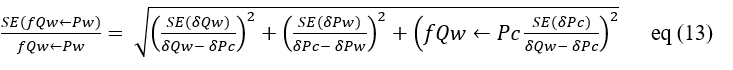
###use for figure s3

In [20]:
#Am1
# Qw from Pw / Pc
# Isotopic signatures and their standard errors
delta_pw = delta_Warm7  # isotopic sig for warm precipitation:  Warm7 = individual values 
delta_pc = delta_Cold7  # isotopic sig for cold precipitation Cold7
delta_Qc = AM1_MC_Cold  # isotopic sig for cold stream mixing
delta_Qw = AM1_MC_Warm  # isotopic sig for warm stream mixing 

SE_delta_pw = se_am1pw  # standard error for warm precipitation
SE_delta_pc = se_am1pc  # standard error for cold precipitation

SE_delta_Q_c = se_am1qc # standard error for cold stream mixing
SE_delta_Q_w = se_am1qw # standard error for warm stream mixing

# Fraction of summer streamflow from winter precipitation 
f_Qw_pc = df['AM1_fM_QW_PC'].mean()
f_Qw_pw = df['AM1_fM_QW_PW'].mean()
print('f_Qw_pc mean',f_Qw_pc)
print('f_Qw_pw mean',f_Qw_pw)

# Fraction of summer streamflow from summer precipitation (needs estimation or data)
f_Qc_pw = df['AM1_fM_QC_PW'].mean()
f_Qc_pc = df['AM1_fM_QC_PC'].mean()
print('f_Qc_pw mean',f_Qc_pw)
print('f_Qc_pc mean',f_Qc_pc)

# Calculate the squared terms for each component of the equation
term1 = ((SE_delta_Q_w) / (delta_Qw - delta_pc)) **2
term2 = ((SE_delta_pw) / (delta_pc - delta_pw)) **2
term3 = ((f_Qw_pc) * (SE_delta_pc  / (delta_Qw - delta_pc)))** 2

# Summing the squared terms and taking the square root to find SE for f_p_s
SE_f_Qw_pw = np.sqrt(term1 + term2 + term3)
SE_f_Qw_pw = SE_f_Qw_pw / f_Qw_pw
print("1. SE of the fraction of warm streamflow from warm precipitation:", SE_f_Qw_pw)
#Make sure SE calculated correctly
# can do unweighted for the first few AM
# subsitute for each fQ 
# should get around 9% 

f_Qw_pc mean 0.6790118755783514
f_Qw_pw mean 0.3209881244216484
f_Qc_pw mean 0.29849276173678113
f_Qc_pc mean 0.701507238263219
1. SE of the fraction of warm streamflow from warm precipitation: 0.18340860128103753


### Qc from Pw / Pc
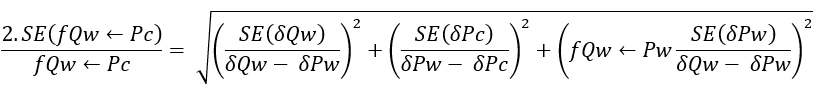

In [21]:
# Calculate the squared terms for each component of the equation
term1 = ((SE_delta_Q_w) / (delta_Qw - delta_pw)) **2
term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
term3 = ((f_Qw_pw) * (SE_delta_pw  / (delta_Qw - delta_pw)))** 2

# Summing the squared terms and taking the square root to find SE 
SE_f_Qw_pc = np.sqrt(term1 + term2 + term3)
SE_f_Qw_pc = SE_f_Qw_pc / f_Qw_pc

print("2. Standard Error of the fraction of warm streamflow from cold precipitation:", (SE_f_Qw_pc))

2. Standard Error of the fraction of warm streamflow from cold precipitation: 0.040986693984691694


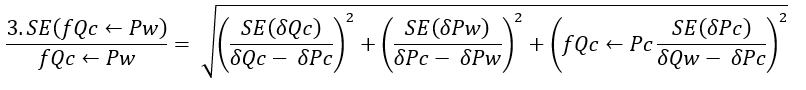
### 2nd try i changed sQc
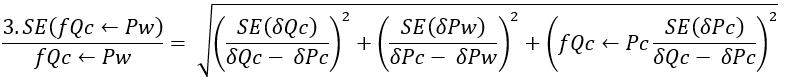

In [22]:
# Calculate the squared terms for each component of the equation
term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pc)) **2
term2 = ((SE_delta_pw) / (delta_pc - delta_pw)) **2
term3 = ((f_Qc_pc) * (SE_delta_pc  / (delta_Qc - delta_pc)))** 2

#this is not the right one
#term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pw)) **2 #they have the same columns
#term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
#term3 = ((f_Qc_pw) * (SE_delta_pw  / (delta_Qc - delta_pw)))** 2 #they have the same columns

# Summing the squared terms and taking the square root to find SE
SE_f_Qc_pw = term1 + term2 + term3
SE_f_Qc_pw = SE_f_Qc_pw / f_Qc_pw

print("3. Standard Error of the fraction of cold streamflow from warm precipitation:", SE_f_Qc_pw)

3. Standard Error of the fraction of cold streamflow from warm precipitation: 0.012779439844138655


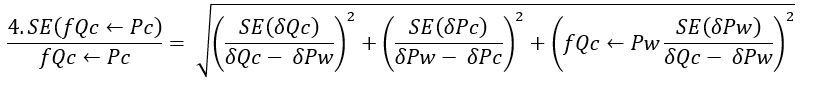

In [23]:
#these need to have the terms equal 1 and 3 number is each column. there needs to be 
# Calculate the squared terms for each component of the equation
term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pw)) **2 #they have the same columns
term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
term3 = ((f_Qc_pw) * (SE_delta_pw  / (delta_Qc - delta_pw)))** 2 #they have the same columns

# Summing the squared terms and taking the square root to find SE
SE_f_Qc_pc = np.sqrt(term1 + term2 + term3)
SE_f_Qc_pc = SE_f_Qc_pc / f_Qc_pc

print("4. SE of the fraction of cold streamflow from cold precipitation:", SE_f_Qc_pc)

4. SE of the fraction of cold streamflow from cold precipitation: 0.037462115828498004


## Horizontal bars show seasonal volume-weighted precipitation means ± standard errors
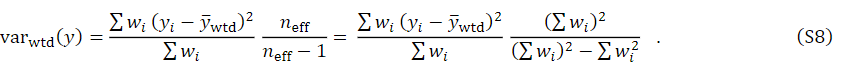

In [24]:
#am2 or am3?? unweighted
# Calculate weighted average
df['wrf_Cold'] = np.where((df['Collection_Date'] >= '2022-11-11') &
                        (df['Collection_Date'] < '2023-04-09'), df['D_18O_Precip'], np.nan) 
df['wrf_Warm'] = np.where((df['Collection_Date']  < '2022-11-11') |
                        (df['Collection_Date']  >= '2023-04-09'),df['D_18O_Precip'], np.nan)

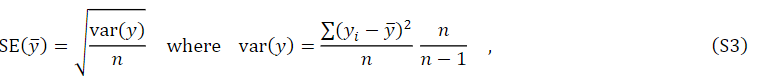

# AM2 SE
Same as AM1

In [25]:
merged_df['Cold7_avg'] = np.where((merged_df['MC_Sampling'] >= '2022-10-29') &
                        (merged_df['MC_Sampling'] < '2023-05-01'), merged_df['D_18O_MC'], np.nan) 
merged_df['Warm7_avg'] = np.where((merged_df['MC_Sampling']  < '2022-10-29') |
                        (merged_df['MC_Sampling']  >= '2023-05-01'),merged_df['D_18O_MC'], np.nan)


print('non weighted cold stream', merged_df['Cold7_avg'].mean())
print('non weighted warm stream', merged_df['Warm7_avg'].mean())

non weighted cold stream -16.558256454545454
non weighted warm stream -16.39460142857143


# AM3 SE

In [26]:
# AM3 - Site 4 
# Winter Start = 2022-11-10
# Summer Start = 2023-03-17
conditions = [
    (df['Collection_Date'] >= '12/13/2022') & (df['Collection_Date'] < '02/01/2023') & (df['Site_no'] == 1.0),
    (df['Collection_Date'] >= '12/02/2022') & (df['Collection_Date'] < '03/10/2023') & (df['Site_no'] == 2.0),
    (df['Collection_Date'] >= '12/02/2022') & (df['Collection_Date'] < '03/10/2023') & (df['Site_no'] == 3.0),
    (df['Collection_Date'] >= '11/10/2022') & (df['Collection_Date'] < '03/17/2023') & (df['Site_no'] == 4.0),
    (df['Collection_Date'] >= '11/16/2022') & (df['Collection_Date'] < '04/21/2023') & (df['Site_no'] == 5.0),
    (df['Collection_Date'] >= '11/16/2022') & (df['Collection_Date'] < '04/22/2023') & (df['Site_no'] == 6.0),
    (df['Collection_Date'] >= '11/16/2022') & (df['Collection_Date'] < '04/23/2023') & (df['Site_no'] == 7.0),
    (df['Collection_Date'] >= '11/16/2022') & (df['Collection_Date'] < '04/23/2023') & (df['Site_no'] == 8.0),
    (df['Collection_Date'] >= '11/02/2022') & (df['Collection_Date'] < '04/23/2023') & (df['Site_no'] == 9.0),
    (df['Collection_Date'] >= '11/02/2022') & (df['Collection_Date'] < '04/23/2023') & (df['Site_no'] == 10.0)]
# Define the choices
choices = [df['D_18O_Precip'],df['D_18O_Precip'],df['D_18O_Precip'],
           df['D_18O_Precip'],df['D_18O_Precip'],df['D_18O_Precip']
           ,df['D_18O_Precip'],df['D_18O_Precip'],df['D_18O_Precip'],
           df['D_18O_Precip']]
# Create the new column
df['wrf_Cold7'] = np.select(conditions, choices, default=np.nan)
#warm is everything not cold
df['wrf_Warm7'] = df.loc[df['wrf_Cold7'].isna(), 'D_18O_Precip']

delta_Cold7 = df['wrf_Cold7'].mean()
delta_Warm7 = df['wrf_Warm7'].mean()
#MC 
df['wrf_MC_Cold7'] = np.where((df['MC_Sampling'] >= '2022-11-10') &
                        (df['MC_Sampling'] < '2023-03-17'), df['D_18O_MC'], np.nan) 
df['wrf_MC_Warm7'] = np.where((df['MC_Sampling']  < '2022-11-10') |
                        (df['MC_Sampling']  >= '2023-03-17'),df['D_18O_MC'], np.nan)
#Use avg streamflow for SE
AM3_MC_Cold = df['wrf_MC_Cold7'].mean()
AM3_MC_Warm = df['wrf_MC_Warm7'].mean()

#Cold Season Streamflow
df['AM3_fM_QC_PW'] = (AM3_MC_Cold - delta_Cold7) / (delta_Warm7 - delta_Cold7)
df['AM3_fM_QC_PC'] = 1 - df.AM3_fM_QC_PW

#Warm Season Streamflow
df['AM3_fM_QW_PW'] = (AM3_MC_Warm - delta_Cold7) / (delta_Warm7 - delta_Cold7)
df['AM3_fM_QW_PC'] = 1 - df.AM3_fM_QW_PW

In [27]:
# Am3 Stream cold SE
data_am1qc = df['wrf_MC_Cold7']
# Calculate the mean
mean_am1qc = np.mean(data_am1qc)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1qc = np.var(data_am1qc, ddof=1)
# Calculate the standard error of the mean
n_am1qc = len(data_am1qc)
#standard_error = np.sqrt(variance_y / n)
se_am1qc = np.sqrt(var_am1qc / n_am1qc)
print("Mean qc:", mean_am1qc)
print("Variance qc:", var_am1qc)
print("SE of the Mean qc:", se_am1qc)
print('')

#AM3 Stream Warm
data_am1qw = df['wrf_MC_Warm7']
# Calculate the mean
mean_am1qw = np.mean(data_am1qw)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1_qw = np.var(data_am1qw, ddof=1)
# Calculate the standard error of the mean
n_am1qw = len(data_am1qw)
#standard_error = np.sqrt(variance_y / n)
se_am1qw = np.sqrt(var_am1_qw / n_am1qw)
print("Mean qw:", mean_am1qw)
print("Variance qw:", var_am1_qw)
print("SE of the Mean qw:", se_am1qw)
print('')

# Precip cold SE
data_am1pc = df['wrf_Cold7']
# Calculate the mean
mean_am1pc = np.mean(data_am1pc)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1pc = np.var(data_am1pc, ddof=1)
# Calculate the standard error of the mean
n_am1pc = len(data_am1pc)
#standard_error = np.sqrt(variance_y / n)
se_am1pc = np.sqrt(var_am1pc / n_am1pc)
print("Mean pc:", mean_am1pc)
print("Variance pc:", var_am1pc)
print("SE of the Mean pc:", se_am1pc)
print('')

#AM3 Precip Warm
data_am1pw = df['wrf_Warm7']
# Calculate the mean
mean_am1pw = np.mean(data_am1pw)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1_pw = np.var(data_am1pw, ddof=1)
# Calculate the standard error of the mean
n_am1pw = len(data_am1pw)
#standard_error = np.sqrt(variance_y / n)
se_am1pw = np.sqrt(var_am1_pw / n_am1pw)
print("Mean pw:", mean_am1pw)
print("Variance pw:", var_am1_pw)
print("SE of the Mean pw:", se_am1pw)
#np.var is the same unweighed equation

Mean qc: -16.46600077777778
Variance qc: 0.030350419840444544
SE of the Mean qc: 0.01228808828231847

Mean qw: -16.466952125
Variance qw: 0.3318533669410503
SE of the Mean qw: 0.04063264421405677

Mean pc: -18.915311027397262
Variance pc: 5.44610678768514
SE of the Mean pc: 0.16460576735096405

Mean pw: -12.285800675
Variance pw: 11.611066426452245
SE of the Mean pw: 0.24034662392904704


In [28]:
#Am3 SE Eq 1
# Isotopic signatures and their standard errors
delta_pw = delta_Warm7  # isotopic sig for warm precipitation:  Warm = individual values 
delta_pc = delta_Cold7  # isotopic sig for cold precipitation Cold
delta_Qc = AM3_MC_Cold  # isotopic sig for cold stream mixing
delta_Qw = AM3_MC_Warm  # isotopic sig for warm stream mixing 

SE_delta_pw = se_am1pw  # standard error for warm precipitation
SE_delta_pc = se_am1pc  # standard error for cold precipitation

SE_delta_Q_c = se_am1qc # standard error for cold stream mixing
SE_delta_Q_w = se_am1qw # standard error for warm stream mixing

# Fraction of warm streamflow
f_Qw_pc = df['AM3_fM_QW_PC'].mean()
f_Qw_pw = df['AM3_fM_QW_PW'].mean()
print('f_Qw_pc mean',f_Qw_pc)
print('f_Qw_pw mean',f_Qw_pw)
# Fraction of cold streamflow
f_Qc_pw = df['AM3_fM_QC_PW'].mean()
f_Qc_pc = df['AM3_fM_QC_PC'].mean()
print('f_Qc_pw mean',f_Qc_pw)
print('f_Qc_pc mean',f_Qc_pc)

#1 Calculate the squared terms for each component of the equation
term1 = ((SE_delta_Q_w) / (delta_Qw - delta_pc)) **2
term2 = ((SE_delta_pw) / (delta_pc - delta_pw)) **2
term3 = ((f_Qw_pc) * (SE_delta_pc  / (delta_Qw - delta_pc)))** 2

# Summing the squared terms and taking the square root to find SE
SE_f_Qw_pw = np.sqrt(term1 + term2 + term3)
SE_f_Qw_pw = SE_f_Qw_pw / f_Qw_pw
print("1. SE of the fraction of Q-warm from P-warm:", SE_f_Qw_pw)

f_Qw_pc mean 0.6306878227421537
f_Qw_pw mean 0.3693121772578461
f_Qc_pw mean 0.3694556791413412
f_Qc_pc mean 0.630544320858659
1. SE of the fraction of Q-warm from P-warm: 0.15760078993748852


In [29]:
#Am3 SE Eq 2. 
term1 = ((SE_delta_Q_w) / (delta_Qw - delta_pw)) **2
term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
term3 = ((f_Qw_pw) * (SE_delta_pw  / (delta_Qw - delta_pw)))** 2
# Summing the squared terms and taking the square root to find SE 
SE_f_Qw_pc = np.sqrt(term1 + term2 + term3)
SE_f_Qw_pc = SE_f_Qw_pc / f_Qw_pc
print("2. SE of the fraction of Qw from Pc:", (SE_f_Qw_pc))

#3
term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pc)) **2 #they have the same columns
term2 = ((SE_delta_pw) / (delta_pc - delta_pw)) **2
term3 = ((f_Qc_pc) * (SE_delta_pc  / (delta_Qc - delta_pc)))** 2 #they have the same columns
# Summing the squared terms and taking the square root to find SE
SE_f_Qc_pw = np.sqrt(term1 + term2 + term3)
SE_f_Qc_pw = SE_f_Qc_pw / f_Qc_pw
print("3. SE of the fraction of Qc from Pw:", SE_f_Qc_pw)

#4
term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pw)) **2 #they have the same columns
term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
term3 = ((f_Qc_pw) * (SE_delta_pw  / (delta_Qc - delta_pw)))** 2 #they have the same columns
# Summing the squared terms and taking the square root to find SE
SE_f_Qc_pc = np.sqrt(term1 + term2 + term3)
SE_f_Qc_pc = SE_f_Qc_pc / f_Qc_pc
print("4. SE of the fraction of Qc from Pc:", SE_f_Qc_pc)

2. SE of the fraction of Qw from Pc: 0.054040175906622016
3. SE of the fraction of Qc from Pw: 0.15155563350714074
4. SE of the fraction of Qc from Pc: 0.05203140351123079


# AM4 SE

In [30]:
#AM4 
conditions = [
    (df['Collection_Date'] >= '12/6/2022') & (df['Collection_Date'] < '03/02/2023') & (df['Site_no'] == 1.0),
    (df['Collection_Date'] >= '11/12/2022') & (df['Collection_Date'] < '04/01/2023') & (df['Site_no'] == 2.0),
    (df['Collection_Date'] >= '12/03/2022') & (df['Collection_Date'] < '04/01/2023') & (df['Site_no'] == 3.0),
    (df['Collection_Date'] >= '11/11/2022') & (df['Collection_Date'] < '04/09/2023') & (df['Site_no'] == 4.0),
    (df['Collection_Date'] >= '11/08/2022') & (df['Collection_Date'] < '04/10/2023') & (df['Site_no'] == 5.0),
    (df['Collection_Date'] >= '11/07/2022') & (df['Collection_Date'] < '04/26/2023') & (df['Site_no'] == 6.0),
    (df['Collection_Date'] >= '11/07/2022') & (df['Collection_Date'] < '04/26/2023') & (df['Site_no'] == 7.0),
    (df['Collection_Date'] >= '11/07/2022') & (df['Collection_Date'] < '04/26/2023') & (df['Site_no'] == 8.0),
    (df['Collection_Date'] >= '10/28/2022') & (df['Collection_Date'] < '04/27/2023') & (df['Site_no'] == 9.0),
    (df['Collection_Date'] >= '10/27/2022') & (df['Collection_Date'] < '04/29/2023') & (df['Site_no'] == 10.0)
]

# Define the choices
choices = [df['D_18O_Precip'],df['D_18O_Precip'],df['D_18O_Precip'],
           df['D_18O_Precip'],df['D_18O_Precip'],df['D_18O_Precip']
           ,df['D_18O_Precip'],df['D_18O_Precip'],df['D_18O_Precip'],
           df['D_18O_Precip']]

# Create the new column
df['moving_Cold7'] = np.select(conditions, choices, default=np.nan)

# Create the new column 'warm_wrf_7' for all other values
df['moving_Warm7'] = df.loc[df['moving_Cold7'].isna(), 'D_18O_Precip']

delta_Cold = df['moving_Cold7'].mean()
delta_Warm = df['moving_Warm7'].mean()


df['MC_Cold'] = np.where((df['MC_Sampling'] >= '2022-11-11') &
                        (df['MC_Sampling'] < '2023-04-09'), df['D_18O_MC'], np.nan) 
df['MC_Warm'] = np.where((df['MC_Sampling']  < '2022-11-11') |
                        (df['MC_Sampling']  >= '2023-04-09'),df['D_18O_MC'], np.nan)
AM4_MC_Cold = df['MC_Cold'].mean()
AM4_MC_Warm = df['MC_Warm'].mean()

#Cold Season Streamflow
df['AM4_fM_QC_PW'] = (AM4_MC_Cold - delta_Cold) / (delta_Warm - delta_Cold)
df['AM4_fM_QC_PC'] = 1 - df.AM4_fM_QC_PW

#Warm Season Streamflow
df['AM4_fM_QW_PW'] = (AM4_MC_Warm - delta_Cold) / (delta_Warm - delta_Cold)
df['AM4_fM_QW_PC'] = 1 - df.AM4_fM_QW_PW

In [31]:
# Am4 Stream cold SE
# take the average for the streamflow isotope not individal in the model. 
data_am1qc = df['MC_Cold']
# Calculate the mean
mean_am1qc = np.mean(data_am1qc)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1qc = np.var(data_am1qc, ddof=1)
# Calculate the standard error of the mean
n_am1qc = len(data_am1qc)
#standard_error = np.sqrt(variance_y / n)
se_am1qc = np.sqrt(var_am1qc / n_am1qc)
print("Mean qc:", mean_am1qc)
print("Variance qc:", var_am1qc)
print("SE of the Mean qc:", se_am1qc)
print('')

#AM4 Stream Warm
data_am1qw = df['MC_Warm']
# Calculate the mean
mean_am1qw = np.mean(data_am1qw)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1_qw = np.var(data_am1qw, ddof=1)
# Calculate the standard error of the mean
n_am1qw = len(data_am1qw)
#standard_error = np.sqrt(variance_y / n)
se_am1qw = np.sqrt(var_am1_qw / n_am1qw)
print("Mean qw:", mean_am1qw)
print("Variance qw:", var_am1_qw)
print("SE of the Mean qw:", se_am1qw)
print('')

# Precip cold SE
data_am1pc = df['moving_Cold7']
# Calculate the mean
mean_am1pc = np.mean(data_am1pc)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1pc = np.var(data_am1pc, ddof=1)
# Calculate the standard error of the mean
n_am1pc = len(data_am1pc)
#standard_error = np.sqrt(variance_y / n)
se_am1pc = np.sqrt(var_am1pc / n_am1pc)
print("Mean pc:", mean_am1pc)
print("Variance pc:", var_am1pc)
print("SE of the Mean pc:", se_am1pc)
print('')

#AM4 Precip Warm
data_am1pw = df['moving_Warm7']
# Calculate the mean
mean_am1pw = np.mean(data_am1pw)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1_pw = np.var(data_am1pw, ddof=1)
# Calculate the standard error of the mean
n_am1pw = len(data_am1pw)
#standard_error = np.sqrt(variance_y / n)
se_am1pw = np.sqrt(var_am1_pw / n_am1pw)
print("Mean pw:", mean_am1pw)
print("Variance pw:", var_am1_pw)
print("SE of the Mean pw:", se_am1pw)
#np.var is the same unweighed equation

Mean qc: -16.503651100000003
Variance qc: 0.04115361860365578
SE of the Mean qc: 0.014308891332401213

Mean qw: -16.441915333333334
Variance qw: 0.3448113342318099
SE of the Mean qw: 0.04141834466495642

Mean pc: -18.8366567654321
Variance pc: 5.721939610835305
SE of the Mean pc: 0.16872273482828815

Mean pw: -11.637674458333331
Variance pw: 7.799474540191099
SE of the Mean pw: 0.19698567440641146


In [32]:
#Am4 SE Eq 1
# Isotopic signatures and their standard errors
delta_pw = delta_Warm  # isotopic sig for warm precipitation:  Warm = individual values 
delta_pc = delta_Cold  # isotopic sig for cold precipitation Cold
delta_Qc = AM4_MC_Cold  # isotopic sig for cold stream mixing
delta_Qw = AM4_MC_Warm  # isotopic sig for warm stream mixing 

SE_delta_pw = se_am1pw  # standard error for warm precipitation
SE_delta_pc = se_am1pc  # standard error for cold precipitation

SE_delta_Q_c = se_am1qc # standard error for cold stream mixing
SE_delta_Q_w = se_am1qw # standard error for warm stream mixing

# Fraction of warm streamflow
f_Qw_pw = df['AM4_fM_QW_PW'].mean()
f_Qw_pc = df['AM4_fM_QW_PC'].mean()
print('1. f_Qw_pw mean',f_Qw_pw)
print('2. f_Qw_pc mean',f_Qw_pc)
# Fraction of cold streamflow
f_Qc_pw = df['AM4_fM_QC_PW'].mean()
f_Qc_pc = df['AM4_fM_QC_PC'].mean()
print('3. f_Qc_pw mean',f_Qc_pw)
print('4. f_Qc_pc mean',f_Qc_pc)

1. f_Qw_pw mean 0.33264999550524804
2. f_Qw_pc mean 0.6673500044947521
3. f_Qc_pw mean 0.3240743713360107
4. f_Qc_pc mean 0.6759256286639894


In [33]:
#AM4
#1 Calculate the squared terms for each component of the equation
term1 = ((SE_delta_Q_w) / (delta_Qw - delta_pc)) **2
term2 = ((SE_delta_pw) / (delta_pc - delta_pw)) **2
term3 = ((f_Qw_pc) * (SE_delta_pc  / (delta_Qw - delta_pc)))** 2
# Summing the squared terms and taking the square root to find SE
SE_f_Qw_pw = np.sqrt(term1 + term2 + term3)
SE_f_Qw_pw = SE_f_Qw_pw / f_Qw_pw
print("1. SE of the fraction of Q-warm from P-warm:", SE_f_Qw_pw)

#SE Eq 2. 
term1 = ((SE_delta_Q_w) / (delta_Qw - delta_pw)) **2
term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
term3 = ((f_Qw_pw) * (SE_delta_pw  / (delta_Qw - delta_pw)))** 2
# Summing the squared terms and taking the square root to find SE 
SE_f_Qw_pc = np.sqrt(term1 + term2 + term3)
SE_f_Qw_pc = SE_f_Qw_pc / f_Qw_pc
print("2. SE of the fraction of Qw from Pc:", (SE_f_Qw_pc))

#3
term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pc)) **2 #they have the same columns
term2 = ((SE_delta_pw) / (delta_pc - delta_pw)) **2
term3 = ((f_Qc_pc) * (SE_delta_pc  / (delta_Qc - delta_pc)))** 2 #they have the same columns
# Summing the squared terms and taking the square root to find SE
SE_f_Qc_pw = np.sqrt(term1 + term2 + term3)
SE_f_Qc_pw = SE_f_Qc_pw / f_Qc_pw
print("3. SE of the fraction of Qc from Pw:", SE_f_Qc_pw)

#4
term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pw)) **2 #they have the same columns
term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
term3 = ((f_Qc_pw) * (SE_delta_pw  / (delta_Qc - delta_pw)))** 2 #they have the same columns
# Summing the squared terms and taking the square root to find SE
SE_f_Qc_pc = np.sqrt(term1 + term2 + term3)
SE_f_Qc_pc = SE_f_Qc_pc / f_Qc_pc
print("4. SE of the fraction of Qc from Pc:", SE_f_Qc_pc)

1. SE of the fraction of Q-warm from P-warm: 0.17160441877504728
2. SE of the fraction of Qw from Pc: 0.04263793616066153
3. SE of the fraction of Qc from Pw: 0.17389524534280648
4. SE of the fraction of Qc from Pc: 0.03997415156836063


# AM5 SE
## need to use weighted for everything
### Winter Start = 2022-12-18
### Summer Start = 2023-05-16 
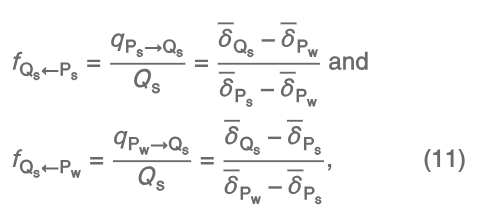

In [34]:
delta_MCE_Snow = -19.53
#Weighted Mean: -19.816
SE_snow = 0.414

delta_MCE_Rain = -12.80
#Weighted Mean: -12.82
SE_rain = 0.495

#USE SITE 4 DATES FOR RAIN AND SNOW
merged_df['stream_Warm'] = np.where((merged_df['MC_Sampling'] >= '2023-05-16') &
                        (merged_df['MC_Sampling'] < '2023-12-18')
                                         | (merged_df['MC_Sampling'] < '2022-12-18'), merged_df['D_18O_MC'], np.nan) 
merged_df['stream_Cold'] = np.where((merged_df['MC_Sampling']  >= '2022-12-18') &
                        (merged_df['MC_Sampling']  < '2023-05-16'),merged_df['D_18O_MC'], np.nan)

warm_stream = merged_df['stream_Warm']
cold_stream = merged_df['stream_Cold']

merged_df['event_Warm_stream'] = np.where((merged_df['MC_Sampling'] >= '2023-05-16') &
                        (merged_df['MC_Sampling'] < '2023-12-18')
                                         | (merged_df['MC_Sampling'] < '2022-12-18'), merged_df['MC_Q_event'], np.nan) 
merged_df['event_Cold_stream'] = np.where((merged_df['MC_Sampling']  >= '2022-12-18') &
                        (merged_df['MC_Sampling']  < '2023-05-16'),merged_df['MC_Q_event'], np.nan)

MC_Cold = (merged_df['stream_Cold'] * merged_df['event_Cold_stream']).sum() / (merged_df['event_Cold_stream']).sum()
#print('weighted cold stream',MC_Cold)
#using average streamflow!!
MC_Cold = MC_Cold.mean()

MC_Warm = (merged_df['stream_Warm'] * merged_df['event_Warm_stream']).sum() / (merged_df['event_Warm_stream']).sum()

#EMMA
df['fM__wghtd_Qc_Rain'] = (MC_Cold - delta_MCE_Snow) / (delta_MCE_Rain - delta_MCE_Snow)
df['fM__wghtd_Qc_Snow'] = 1 - df.fM__wghtd_Qc_Rain

df['fM__wghtd_Qw_Rain'] = (MC_Warm - delta_MCE_Snow) / (delta_MCE_Rain - delta_MCE_Snow)
df['fM__wghtd_Qw_Snow'] = 1 - df.fM__wghtd_Qw_Rain

In [35]:
#weighted seasons only
y = merged_df['stream_Cold']  # isotopic measurements
w = merged_df['event_Cold_stream']  # weights (streamflow volumes cfs)

# Calculate weighted average
# eq 4
yw = np.sum(w * y) / np.sum(w)

# Calculate weighted variance
# eq 8
var_w = (np.sum(w * (y - yw) ** 2) / np.sum(w)) * ((np.sum(w)**2)/ ((np.sum(w)**2)-np.sum(w**2)))

# Calculate effective sample size
# eq 6
n_eff = (np.sum(w) ** 2) / np.sum(w ** 2)

# Calculate standard error of the weighted mean
# eq 5
se_yw_c = np.sqrt(var_w / n_eff)

print("Cold Weighted Mean:", yw)
print("Cold Weighted Variance:", var_w)
print("Cold neff:", n_eff)
print("Cold SE Weighted Mean:", se_yw_c)

Cold Weighted Mean: -17.109794047869563
Cold Weighted Variance: 0.2584708246196119
Cold neff: 3.650246624037188
Cold SE Weighted Mean: 0.26609986866794666


In [36]:
#weighted seasons only
y = merged_df['stream_Warm']  # isotopic measurements
w = merged_df['event_Warm_stream']  # weights (streamflow volumes cfs)

# Calculate weighted average
# eq 4
yw = np.sum(w * y) / np.sum(w)

# Calculate weighted variance
# eq 8
var_w = (np.sum(w * (y - yw) ** 2) / np.sum(w)) * ((np.sum(w)**2)/ ((np.sum(w)**2)-np.sum(w**2)))

# Calculate effective sample size
# eq 6
n_eff = (np.sum(w) ** 2) / np.sum(w ** 2)

# Calculate standard error of the weighted mean
# eq 5
se_yw_w = np.sqrt(var_w / n_eff)

print("Warm Weighted Mean:", yw)
print("Warm Weighted Variance:", var_w)
print("Warm neff:", n_eff)
print("Warm SE Weighted Mean:", se_yw_w)

Warm Weighted Mean: -16.98079690117298
Warm Weighted Variance: 0.27709998560489546
Warm neff: 3.7078703110958684
Warm SE Weighted Mean: 0.2733732297999174


In [37]:
#Am5 SE Eq 1
# Isotopic signatures and their standard errors
delta_pw = delta_MCE_Rain  # isotopic sig for warm precipitation:  average
delta_pc = delta_MCE_Snow  # isotopic sig for cold precipitation average
delta_Qc = MC_Cold  # isotopic sig for cold stream mixing
delta_Qw = MC_Warm  # isotopic sig for warm stream mixing 

SE_delta_pw = 0.495  # standard error for warm precipitation
SE_delta_pc = 0.414  # standard error for cold precipitation

SE_delta_Q_c = se_yw_c # standard error for cold stream mixing
SE_delta_Q_w = se_yw_w # standard error for warm stream mixing

# Fraction of warm streamflow
f_Qw_pw = df['fM__wghtd_Qw_Rain'].mean()
f_Qw_pc = df['fM__wghtd_Qw_Snow'].mean()
print('1. f_Qw_pw mean',f_Qw_pw)
print('2. f_Qw_pc mean',f_Qw_pc)
# Fraction of cold streamflow
f_Qc_pw = df['fM__wghtd_Qc_Rain'].mean()
f_Qc_pc = df['fM__wghtd_Qc_Snow'].mean()
print('3. f_Qc_pw mean',f_Qc_pw)
print('4. f_Qc_pc mean',f_Qc_pc)

1. f_Qw_pw mean 0.3787820354869274
2. f_Qw_pc mean 0.6212179645130727
3. f_Qc_pw mean 0.359614554551328
4. f_Qc_pc mean 0.6403854454486718


In [38]:
#AM5 Weighted stream (mass) and Precip (area * mass)
#1 Calculate the squared terms for each component of the equation
term1 = ((SE_delta_Q_w) / (delta_Qw - delta_pc)) **2
term2 = ((SE_delta_pw) / (delta_pc - delta_pw)) **2
term3 = ((f_Qw_pc) * (SE_delta_pc  / (delta_Qw - delta_pc)))** 2
# Summing the squared terms and taking the square root to find SE
SE_f_Qw_pw = np.sqrt(term1 + term2 + term3)
SE_f_Qw_pw = SE_f_Qw_pw / f_Qw_pw
print("1. SE of the fraction of Q-warm from P-warm:", SE_f_Qw_pw)

#SE Eq 2. 
term1 = ((SE_delta_Q_w) / (delta_Qw - delta_pw)) **2
term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
term3 = ((f_Qw_pw) * (SE_delta_pw  / (delta_Qw - delta_pw)))** 2
# Summing the squared terms and taking the square root to find SE 
SE_f_Qw_pc = np.sqrt(term1 + term2 + term3)
SE_f_Qw_pc = SE_f_Qw_pc / f_Qw_pc
print("2. SE of the fraction of Qw from Pc:", SE_f_Qw_pc)

#3
term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pc)) **2 #they have the same columns
term2 = ((SE_delta_pw) / (delta_pc - delta_pw)) **2
term3 = ((f_Qc_pc) * (SE_delta_pc  / (delta_Qc - delta_pc)))** 2 #they have the same columns
# Summing the squared terms and taking the square root to find SE
SE_f_Qc_pw = np.sqrt(term1 + term2 + term3)
SE_f_Qc_pw = SE_f_Qc_pw / f_Qc_pw
print("3. SE of the fraction of Qc from Pw:", SE_f_Qc_pw)

#4
term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pw)) **2 #they have the same columns
term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
term3 = ((f_Qc_pw) * (SE_delta_pw  / (delta_Qc - delta_pw)))** 2 #they have the same columns
# Summing the squared terms and taking the square root to find SE
SE_f_Qc_pc = np.sqrt(term1 + term2 + term3)
SE_f_Qc_pc = SE_f_Qc_pc / f_Qc_pc
print("4. SE of the fraction of Qc from Pc:", SE_f_Qc_pc)

1. SE of the fraction of Q-warm from P-warm: 0.43451200344227886
2. SE of the fraction of Qw from Pc: 0.16154462514288695
3. SE of the fraction of Qc from Pw: 0.477598758698249
4. SE of the fraction of Qc from Pc: 0.1506103454642071


# AM6 SE: Sine unweighted

In [39]:
#Sine curve fitting - Site 4 @ 50% of watershed area 
# Winter Start = 2023-02-27
# Summer Start =  2023-07-27

delta_Sine_trough = -19.67
delta_Sine_peak = -9.75


df['sine_Warm'] = np.where((df['MC_Sampling'] >= '2023-02-27') &
                        (df['MC_Sampling'] < '2023-07-27'), df['D_18O_MC'], np.nan) 
df['sine_Cold'] = np.where((df['MC_Sampling']  < '2023-02-27') |
                        (df['MC_Sampling']  >= '2023-07-27'),df['D_18O_MC'], np.nan)

AM6_MC_Cold = df['sine_Cold'].mean()
AM6_MC_Warm = df['sine_Warm'].mean()

df['fM__Sine_Qw_pw'] = (AM6_MC_Warm - delta_Sine_trough) / (delta_Sine_peak - delta_Sine_trough)
df['fM__Sine_Qw_pc'] = 1 - df['fM__Sine_Qw_pw']

df['fM__Sine_Qc_pw'] = (AM6_MC_Cold - delta_Sine_trough) / (delta_Sine_peak - delta_Sine_trough)
df['fM__Sine_Qc_pc'] = 1 - df['fM__Sine_Qc_pw']

In [40]:
# Am6 Stream cold SE
data_am1qc = df['sine_Cold']
# Calculate the mean
mean_am1qc = np.mean(data_am1qc)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1qc = np.var(data_am1qc, ddof=1)
# Calculate the standard error of the mean
n_am1qc = len(data_am1qc)
#standard_error = np.sqrt(variance_y / n)
se_am1qc = np.sqrt(var_am1qc / n_am1qc)
print("Mean qc:", mean_am1qc)
print("SE of the Mean qc:", se_am1qc)

#AM6 Stream Warm
data_am1qw = df['sine_Warm']
# Calculate the mean
mean_am1qw = np.mean(data_am1qw)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1_qw = np.var(data_am1qw, ddof=1)
# Calculate the standard error of the mean
n_am1qw = len(data_am1qw)
#standard_error = np.sqrt(variance_y / n)
se_am1qw = np.sqrt(var_am1_qw / n_am1qw)
print("Mean qw:", mean_am1qw)
print("SE of the Mean qw:", se_am1qw)

#Peak f SE 0.07915216091593402 #this was calculated through one value?? yes this was just site 10!!!
#Trough f SE 0.1223973051897811
#i did not try to calculate them through the other methods. doulble check to see if they would still be teh same values by using eq3
# Precip cold SE (trough)
data_am1pc = 0.122
#AM6 Precip Warm (peak)
data_am1pw = 0.079

#Manual calcualation of Se 6/3/23
#SE_Peak =  0.5911029239199097
#SE_Trough =  0.18819139193916384

#06/10/24 individaul sites / total sites
#this is the fraction
#SE_Peak = 0.132
#SE_Trough = 0.111

#residual SE this is raw 
SE_Peak = 0.75646
SE_Trough =  0.7143

Mean qc: -16.184929599999997
SE of the Mean qc: 0.016778866592064134
Mean qw: -16.8891297
SE of the Mean qw: 0.02834085302940881


In [41]:
#Am6 SE Eq 1
# Isotopic signatures and their standard errors
delta_pw = delta_Sine_peak  # isotopic sig for warm precipitation:  average
delta_pc = delta_Sine_trough  # isotopic sig for cold precipitation average
delta_Qc = AM6_MC_Cold  # isotopic sig for cold stream mixing average
delta_Qw = AM6_MC_Warm  # isotopic sig for warm stream mixing average
## i can also use am5 mass weighing standdard error metric rather than the sine equation SE **
#SE_delta_pw = data_am1pw  # standard error for warm precipitation
#SE_delta_pc = data_am1pc  # standard error for cold precipitation
SE_delta_pw = SE_Peak
SE_delta_pC = SE_Trough

SE_delta_Q_c = se_am1qc # standard error for cold stream mixing
SE_delta_Q_w = se_am1qw # standard error for warm stream mixing

# Fraction of warm streamflow
f_Qw_pw = df['fM__Sine_Qw_pw'].mean()
f_Qw_pc = df['fM__Sine_Qw_pc'].mean()
print('1. f_Qw_pw mean',f_Qw_pw)
print('2. f_Qw_pc mean',f_Qw_pc)
# Fraction of cold streamflow
f_Qc_pw = df['fM__Sine_Qc_pw'].mean()
f_Qc_pc = df['fM__Sine_Qc_pc'].mean()
print('3. f_Qc_pw mean',f_Qc_pw)
print('4. f_Qc_pc mean',f_Qc_pc)

1. f_Qw_pw mean 0.2803296673387096
2. f_Qw_pc mean 0.7196703326612904
3. f_Qc_pw mean 0.35131758064516166
4. f_Qc_pc mean 0.6486824193548382


In [42]:
#AM6 
#1 Calculate the squared terms for each component of the equation
term1 = ((SE_delta_Q_w) / (delta_Qw - delta_pc)) **2
term2 = ((SE_delta_pw) / (delta_pc - delta_pw)) **2
# the SE_delta_pc is driving the high value term 1 and 2 are negligable
# no this is not the case becuase a higher SE will produce a lower overall value when sqrd
#need to look into yes thats it. the numerator needs to be smaller and it would be if the SE was smaller
term3 = ((f_Qw_pc) * (SE_delta_pc  / (delta_Qw - delta_pc)))** 2
# Summing the squared terms and taking the square root to find SE
SE_f_Qw_pw = np.sqrt(term1 + term2 + term3)
# .1319 / .719
SE_f_Qw_pw = SE_f_Qw_pw #/ f_Qw_pw
print("1. SE of the fraction of Q-warm from P-warm:", SE_f_Qw_pw)

#SE Eq 2. 
term1 = ((SE_delta_Q_w) / (delta_Qw - delta_pw)) **2
term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
term3 = ((f_Qw_pw) * (SE_delta_pw  / (delta_Qw - delta_pw)))** 2
# Summing the squared terms and taking the square root to find SE 
SE_f_Qw_pc = np.sqrt(term1 + term2 + term3)
SE_f_Qw_pc = SE_f_Qw_pc / f_Qw_pc
print("2. SE of the fraction of Qw from Pc:", SE_f_Qw_pc)

#3
term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pc)) **2 
term2 = ((SE_delta_pw) / (delta_pc - delta_pw)) **2
term3 = ((f_Qc_pc) * (SE_delta_pc  / (delta_Qc - delta_pc)))** 2 
# Summing the squared terms and taking the square root to find SE
SE_f_Qc_pw = np.sqrt(term1 + term2 + term3)
SE_f_Qc_pw = SE_f_Qc_pw / f_Qc_pw
print("3. SE of the fraction of Qc from Pw:", SE_f_Qc_pw)

#4
term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pw)) **2 
term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
term3 = ((f_Qc_pw) * (SE_delta_pw  / (delta_Qc - delta_pw)))** 2 
# Summing the squared terms and taking the square root to find SE
SE_f_Qc_pc = np.sqrt(term1 + term2 + term3)
SE_f_Qc_pc = SE_f_Qc_pc / f_Qc_pc
print("4. SE of the fraction of Qc from Pc:", SE_f_Qc_pc)

1. SE of the fraction of Q-warm from P-warm: 0.13190114136821335
2. SE of the fraction of Qw from Pc: 0.07139214249495392
3. SE of the fraction of Qc from Pw: 0.30888901012096875
4. SE of the fraction of Qc from Pc: 0.09060203824037914


# AM7 SE

In [43]:
#Am7 
delta_Sine_Cold_Mass = -19.50
delata_Sine_Warm_Mass = -10.43

merged_df['sine_stream_Warm'] = np.where((merged_df['MC_Sampling'] >= '2023-05-29') &
                        (merged_df['MC_Sampling'] < '2023-10-26')
                                         | (merged_df['MC_Sampling'] < '2022-10-26'), merged_df['D_18O_MC'], np.nan) 
merged_df['sine__stream_Cold'] = np.where((merged_df['MC_Sampling']  >= '2022-10-26') &
                        (merged_df['MC_Sampling']  < '2023-05-29'),merged_df['D_18O_MC'], np.nan)

merged_df['event_Warm_sine'] = np.where((merged_df['MC_Sampling'] >= '2023-05-29') &
                        (merged_df['MC_Sampling'] < '2023-10-26')
                                         | (merged_df['MC_Sampling'] < '2022-10-26'), merged_df['MC_Q_event'], np.nan) 
merged_df['event_Cold_sine'] = np.where((merged_df['MC_Sampling']  >= '2022-10-26') &
                        (merged_df['MC_Sampling']  < '2023-05-29'),merged_df['MC_Q_event'], np.nan)

AM7_MC_Cold = (merged_df['sine__stream_Cold'] * merged_df['event_Cold_sine']).sum() / (merged_df['event_Cold_sine']).sum()
print('weighted cold stream am6',AM7_MC_Cold)

AM7_MC_Warm = (merged_df['sine_stream_Warm'] * merged_df['event_Warm_sine']).sum() / (merged_df['event_Warm_sine']).sum()
print('weighted warm stream am6',AM7_MC_Warm)

df['fM__Sine_Qw_pw_mass'] = (AM7_MC_Warm - delta_Sine_Cold_Mass) / (delata_Sine_Warm_Mass - delta_Sine_Cold_Mass)
df['fM__Sine_Qw_pc_mass'] = 1 - df['fM__Sine_Qw_pw_mass']

df['fM__Sine_Qc_pw_mass'] = (AM7_MC_Cold - delta_Sine_Cold_Mass) / (delata_Sine_Warm_Mass - delta_Sine_Cold_Mass)
df['fM__Sine_Qc_pc_mass'] = 1 - df['fM__Sine_Qc_pw_mass']

weighted cold stream am6 -17.1273861005571
weighted warm stream am6 -16.906525800555034


In [44]:
#AM7 weighted seasons only convert standard error from sine curve to a percet. 
y = merged_df['sine_stream_Warm']  # isotopic measurements
w = merged_df['event_Warm_sine']  # weights (streamflow volumes cfs)

# Calculate weighted average
# eq 4
yw = np.sum(w * y) / np.sum(w)

# Calculate weighted variance
# eq 8
var_w = (np.sum(w * (y - yw) ** 2) / np.sum(w)) * ((np.sum(w)**2)/ ((np.sum(w)**2)-np.sum(w**2)))

# Calculate effective sample size
# eq 6
n_eff = (np.sum(w) ** 2) / np.sum(w ** 2)

# Calculate standard error of the weighted mean
# eq 5
se_yw_c = np.sqrt(var_w / n_eff)

print("Cold Weighted Mean:", yw)
print("Cold Weighted Variance:", var_w)
print("Cold neff:", n_eff)
print("Cold SE Weighted Mean:", se_yw_c)

Cold Weighted Mean: -16.906525800555034
Cold Weighted Variance: 0.2889147545431668
Cold neff: 2.1284369877790255
Cold SE Weighted Mean: 0.3684295553469248


In [45]:
#weighted seasons only
y = merged_df['stream_Warm']  # isotopic measurements
w = merged_df['event_Warm_stream']  # weights (streamflow volumes cfs)

# Calculate weighted average
# eq 4
yw = np.sum(w * y) / np.sum(w)

# Calculate weighted variance
# eq 8
var_w = (np.sum(w * (y - yw) ** 2) / np.sum(w)) * ((np.sum(w)**2)/ ((np.sum(w)**2)-np.sum(w**2)))

# Calculate effective sample size
# eq 6
n_eff = (np.sum(w) ** 2) / np.sum(w ** 2)

# Calculate standard error of the weighted mean
# eq 5
se_yw_w = np.sqrt(var_w / n_eff)

print("Warm Weighted Mean:", yw)
print("Warm Weighted Variance:", var_w)
print("Warm neff:", n_eff)
print("Warm SE Weighted Mean:", se_yw_w)

Warm Weighted Mean: -16.98079690117298
Warm Weighted Variance: 0.27709998560489546
Warm neff: 3.7078703110958684
Warm SE Weighted Mean: 0.2733732297999174


In [46]:
#Am7 SE Eq 1
# Isotopic signatures and their standard errors
delta_pw = delata_Sine_Warm_Mass  # isotopic sig for warm precipitation:  average
delta_pc = delta_Sine_Cold_Mass  # isotopic sig for cold precipitation average
delta_Qc = -16.906  # isotopic sig for cold stream mixing
delta_Qw = -16.980  # isotopic sig for warm stream mixing 

#where does this come from????
#it is the same standard error as AM6. this SE for sine curve fraction, this is not weighted
#is there a way to weight this??
SE_delta_pw = 0.69145  # standard error for warm precipitation
#Warm SE Weighted Mean: 0.6914581731187124
SE_delta_pc = 0.2097  # standard error for cold precipitation
#Cold SE Weighted Mean precip am7: 0.2097182659448261

SE_delta_Q_c = se_yw_c # standard error for cold stream mixing
SE_delta_Q_w = se_yw_w # standard error for warm stream mixing

# Fraction of warm streamflow
f_Qw_pw = df['fM__Sine_Qw_pw_mass'].mean()
f_Qw_pc = df['fM__Sine_Qw_pc_mass'].mean()
print('1. f_Qw_pw mean',f_Qw_pw)
print('2. f_Qw_pc mean',f_Qw_pc)
# Fraction of cold streamflow
f_Qc_pw = df['fM__Sine_Qc_pw_mass'].mean()
f_Qc_pc = df['fM__Sine_Qc_pc_mass'].mean()
print('3. f_Qc_pw mean',f_Qc_pw)
print('4. f_Qc_pc mean',f_Qc_pc)

1. f_Qw_pw mean 0.2859398235330723
2. f_Qw_pc mean 0.7140601764669279
3. f_Qc_pw mean 0.2615891840620618
4. f_Qc_pc mean 0.7384108159379383


In [47]:
#AM7
#1 Calculate the squared terms for each component of the equation
term1 = ((SE_delta_Q_w) / (delta_Qw - delta_pc)) **2
term2 = ((SE_delta_pw) / (delta_pc - delta_pw)) **2
term3 = ((f_Qw_pc) * (SE_delta_pc  / (delta_Qw - delta_pc)))** 2
# Summing the squared terms and taking the square root to find SE
SE_f_Qw_pw = np.sqrt(term1 + term2 + term3)
SE_f_Qw_pw = SE_f_Qw_pw / f_Qw_pw
print("1. SE of the fraction of Q-warm from P-warm:", SE_f_Qw_pw)

#SE Eq 2. 
term1 = ((SE_delta_Q_w) / (delta_Qw - delta_pw)) **2
term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
term3 = ((f_Qw_pw) * (SE_delta_pw  / (delta_Qw - delta_pw)))** 2
# Summing the squared terms and taking the square root to find SE 
SE_f_Qw_pc = np.sqrt(term1 + term2 + term3)
SE_f_Qw_pc = SE_f_Qw_pc / f_Qw_pc
print("2. SE of the fraction of Qw from Pc:", SE_f_Qw_pc)

#3 - double check this term....it shouldn't be so high!!
term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pc)) **2 
term2 = ((SE_delta_pw) / (delta_pc - delta_pw)) **2
term3 = ((f_Qc_pc) * (SE_delta_pc  / (delta_Qc - delta_pc)))** 2 
# Summing the squared terms and taking the square root to find SE
SE_f_Qc_pw = np.sqrt(term1 + term2 + term3)
SE_f_Qc_pw = SE_f_Qc_pw / f_Qc_pw
print("3. SE of the fraction of Qc from Pw:", SE_f_Qc_pw)

#4
term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pw)) **2 
term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
term3 = ((f_Qc_pw) * (SE_delta_pw  / (delta_Qc - delta_pw)))** 2 
# Summing the squared terms and taking the square root to find SE
SE_f_Qc_pc = np.sqrt(term1 + term2 + term3)
SE_f_Qc_pc = SE_f_Qc_pc / f_Qc_pc
print("4. SE of the fraction of Qc from Pc:", SE_f_Qc_pc)

1. SE of the fraction of Q-warm from P-warm: 0.5081322810104834
2. SE of the fraction of Qw from Pc: 0.07906750531461872
3. SE of the fraction of Qc from Pw: 0.6571192029181637
4. SE of the fraction of Qc from Pc: 0.09136269638824254


# AM8 SE

In [48]:
#Am8 
d_Sine_Cold_AW = -19.85
d_Sine_Warm_AW = -8.95

df['fM__Sine_Qw_pw_aw'] = (AM7_MC_Warm - d_Sine_Cold_AW) / (d_Sine_Warm_AW - d_Sine_Cold_AW)
df['fM__Sine_Qw_pc_aw'] = 1 - df['fM__Sine_Qw_pw_aw']

df['fM__Sine_Qc_pw_aw'] = (AM7_MC_Cold - d_Sine_Cold_AW) / (d_Sine_Warm_AW - d_Sine_Cold_AW)
df['fM__Sine_Qc_pc_aw'] = 1 - df['fM__Sine_Qc_pw_aw']

In [49]:
#Am8 SE variables
# Isotopic signatures and their standard errors
delta_pw = d_Sine_Warm_AW  # isotopic sig for warm precipitation:  average
delta_pc = d_Sine_Cold_AW  # isotopic sig for cold precipitation average
delta_Qc = -16.906  # isotopic sig for cold stream mixing
delta_Qw = -16.980  # isotopic sig for warm stream mixing  

SE_delta_pw = 0.4866  # standard error for warm precipitation
#warm SE Weighted Mean: 0.486615
SE_delta_pc = 0.2223  # standard error for cold precipitation
#Cold SE Weighted Mean: 0.2223

SE_delta_Q_c = se_yw_c # standard error for cold stream mixing
SE_delta_Q_w = se_yw_w # standard error for warm stream mixing

# Fraction of warm streamflow
f_Qw_pw = df['fM__Sine_Qw_pw_aw'].mean()
f_Qw_pc = df['fM__Sine_Qw_pc_aw'].mean()
print('1. f_Qw_pw mean',f_Qw_pw)
print('2. f_Qw_pc mean',f_Qw_pc)
# Fraction of cold streamflow
f_Qc_pw = df['fM__Sine_Qc_pw_aw'].mean()
f_Qc_pc = df['fM__Sine_Qc_pc_aw'].mean()
print('3. f_Qc_pw mean',f_Qc_pw)
print('4. f_Qc_pc mean',f_Qc_pc)

1. f_Qw_pw mean 0.27004350453623543
2. f_Qw_pc mean 0.7299564954637646
3. f_Qc_pw mean 0.24978109169200924
4. f_Qc_pc mean 0.7502189083079907


In [50]:
#AM8
#1 Calculate the squared terms for each component of the equation
term1 = ((SE_delta_Q_w) / (delta_Qw - delta_pc)) **2
term2 = ((SE_delta_pw) / (delta_pc - delta_pw)) **2
term3 = ((f_Qw_pc) * (SE_delta_pc  / (delta_Qw - delta_pc)))** 2
# Summing the squared terms and taking the square root to find SE
SE_f_Qw_pw = np.sqrt(term1 + term2 + term3)
SE_f_Qw_pw = SE_f_Qw_pw / f_Qw_pw
print("1. SE of the fraction of Q-warm from P-warm:", SE_f_Qw_pw)

#SE Eq 2. 
term1 = ((SE_delta_Q_w) / (delta_Qw - delta_pw)) **2
term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
term3 = ((f_Qw_pw) * (SE_delta_pw  / (delta_Qw - delta_pw)))** 2
# Summing the squared terms and taking the square root to find SE 
SE_f_Qw_pc = np.sqrt(term1 + term2 + term3)
SE_f_Qw_pc = SE_f_Qw_pc / f_Qw_pc
print("2. SE of the fraction of Qw from Pc:", (SE_f_Qw_pc))

#3
term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pc)) **2 #they have the same columns
term2 = ((SE_delta_pw) / (delta_pc - delta_pw)) **2
term3 = ((f_Qc_pc) * (SE_delta_pc  / (delta_Qc - delta_pc)))** 2 #they have the same columns
# Summing the squared terms and taking the square root to find SE
SE_f_Qc_pw = np.sqrt(term1 + term2 + term3)
SE_f_Qc_pw = SE_f_Qc_pw / f_Qc_pw
print("3. SE of the fraction of Qc from Pw:", SE_f_Qc_pw)

#4
term1 = ((SE_delta_Q_c) / (delta_Qc - delta_pw)) **2 #they have the same columns
term2 = ((SE_delta_pc) / (delta_pw - delta_pc)) **2
term3 = ((f_Qc_pw) * (SE_delta_pw  / (delta_Qc - delta_pw)))** 2 #they have the same columns
# Summing the squared terms and taking the square root to find SE
SE_f_Qc_pc = np.sqrt(term1 + term2 + term3)
SE_f_Qc_pc = SE_f_Qc_pc / f_Qc_pc
print("4. SE of the fraction of Qc from Pc:", SE_f_Qc_pc)

1. SE of the fraction of Q-warm from P-warm: 0.44224807526035664
2. SE of the fraction of Qw from Pc: 0.058807339747246556
3. SE of the fraction of Qc from Pw: 0.5782744157622692
4. SE of the fraction of Qc from Pc: 0.07045449602510656


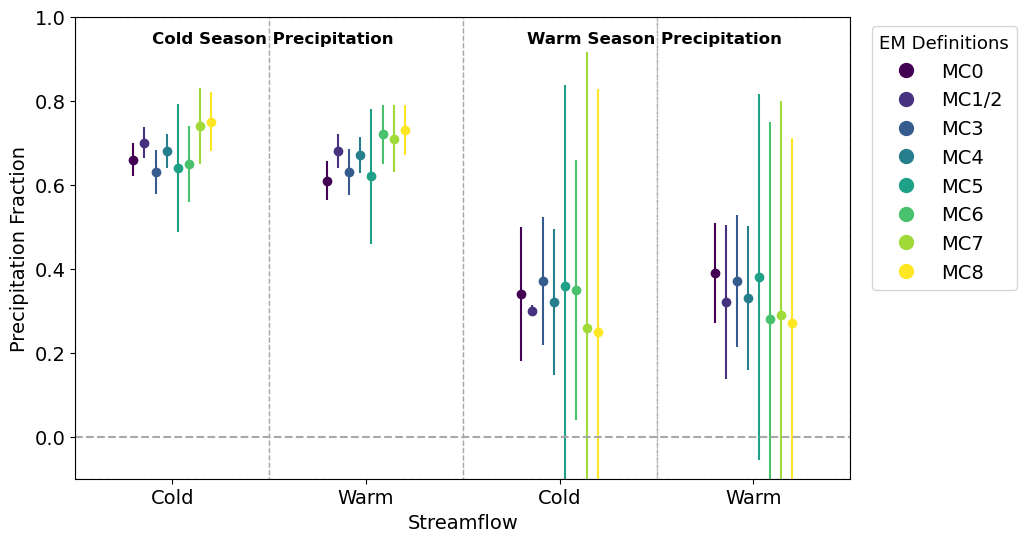

In [51]:
#Precip fraction per season with standard errors
# 8 y-values per category
x_labels = ['Cold','Warm','Cold','Warm']
Seasons = ['Qc - Pc','Qw - Pc','Qc - Pw','Qw - Pw']
#Seasons = ['Warm Season Q','','Cold Season Q','Q']

y_values = {   
    'Qc - Pc': [.66,.7,.63,.68,.64,.65,.74,.75],  #4
    'Qw - Pc': [.61,.68,.63,.67,.62,.72,.71,.73], #2
    'Qc - Pw': [.34,.3,.37,.32,.36,.35,.26,.25],  #3
    'Qw - Pw': [.39,.32,.37,.33,.38,.28,.29,.27]} #1
    
SE = {      
    'Qc - Pc': [.04,.037,.052,.04,.152,.09,.091,.07],  #4
    'Qw - Pc': [.047,.041,.054,.043,.16,.07,.08,.059],  #2
    'Qc - Pw': [.16,.013,.152,.174,.478,.31,.657,.579],#3
    'Qw - Pw': [.12,.183,.157,.172,.435,.47,.51,.442] #1
    
}
# Convert categories to numerical values
x = np.arange(len(Seasons))

# Define a color map for the points
colors = plt.cm.viridis(np.linspace(0, 1, 8))
#This is Am1 but its is same as AM2
labels = ['MC0','MC1/2', 'MC3', 'MC4', 'MC5', 'MC6', 'MC7', 'MC8']

plt.figure(figsize=(10, 6))
# shaded boxes
# Create white-filled boxes with dashed gray outlines
for i in range(len(Seasons)):
    plt.axvspan(i - 0.5, i + 0.5, facecolor='white', edgecolor='gray', linestyle='--', linewidth=1, alpha=0.5)

# Plot each category separately
for i, category in enumerate(Seasons):
    y_vals = y_values[category]
    y_errs = SE[category]
    # Create slight jittering for x values to prevent overlap
    x_vals = i + np.linspace(-0.2, 0.2, len(y_vals))
    for j in range(len(y_vals)):
        plt.errorbar(x_vals[j], y_vals[j], yerr=y_errs[j], fmt='o', capsize=0, capthick=2, ecolor=colors[j], color=colors[j], label=labels[j] if i == 0 else "_nolegend_")
        
# Adding main titles for groups of boxes
plt.text(0.52, 0.93, 'Cold Season Precipitation', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.text(2.49, 0.93, 'Warm Season Precipitation', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.axhline(0, color='darkgray', linestyle='--')
#plt.xticks(x, Seasons)
plt.xticks(np.arange(len(Seasons)), x_labels, fontsize=12)
plt.xlim(-0.5, len(Seasons) - 0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Streamflow',fontsize=14)
plt.ylabel('Precipitation Fraction',fontsize=14)
plt.ylim(-0.1,1.0)

# legend handles
legend_handles = [mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None', markersize=10, label=labels[i]) for i in range(8)]
plt.legend(handles=legend_handles, title="EM Definitions",title_fontsize=13, bbox_to_anchor=(1.015, 1),fontsize=14) 

In [52]:
#y_values
qc_pc_mean = (0.037+0.052+0.04+0.152+0.09+.091+.07)/7
qw_pc_mean = (0.041+0.054+0.043+0.16+0.07+.08+.059)/7
qc_pw_mean = (0.013+0.152+0.174+0.478+0.31+0.657+0.579)/7
qw_pw_mean = (0.183+0.157+0.172+0.435+0.47+0.51+0.442)/7
print('qc_pc_mean ', qc_pc_mean)
print('qw_pc_mean ',qw_pc_mean)
print('qc_pw_mean ',qc_pw_mean)
print('qw_pw_mean ',qw_pw_mean)

qc_pc_mean  0.076
qw_pc_mean  0.07242857142857144
qc_pw_mean  0.3375714285714286
qw_pw_mean  0.33842857142857147


## Variance in alternative methods:

In [53]:
#6 Fraction of warm streamflow
f_Qw_pw = df['fM__Sine_Qw_pw'].mean()
f_Qw_pc = df['fM__Sine_Qw_pc'].mean()
print('1. f_Qw_pw mean',f_Qw_pw)
print('2. f_Qw_pc mean',f_Qw_pc)
# Fraction of cold streamflow
f_Qc_pw = df['fM__Sine_Qc_pw'].mean()
f_Qc_pc = df['fM__Sine_Qc_pc'].mean()

#7 Fraction of warm streamflow
f_Qw_pw = df['fM__Sine_Qw_pw_mass'].mean()
f_Qw_pc = df['fM__Sine_Qw_pc_mass'].mean()
print('1. f_Qw_pw mean',f_Qw_pw)
print('2. f_Qw_pc mean',f_Qw_pc)
# Fraction of cold streamflow
f_Qc_pw = df['fM__Sine_Qc_pw_mass'].mean()
f_Qc_pc = df['fM__Sine_Qc_pc_mass'].mean()
print('3. f_Qc_pw mean',f_Qc_pw)
print('4. f_Qc_pc mean',f_Qc_pc)

#8
f_Qw_pw = df['fM__Sine_Qw_pw_aw'].mean()
f_Qw_pc = df['fM__Sine_Qw_pc_aw'].mean()
print('1. f_Qw_pw mean',f_Qw_pw)
print('2. f_Qw_pc mean',f_Qw_pc)
# Fraction of cold streamflow
f_Qc_pw = df['fM__Sine_Qc_pw_aw'].mean()
f_Qc_pc = df['fM__Sine_Qc_pc_aw'].mean()

1. f_Qw_pw mean 0.2803296673387096
2. f_Qw_pc mean 0.7196703326612904
1. f_Qw_pw mean 0.2859398235330723
2. f_Qw_pc mean 0.7140601764669279
3. f_Qc_pw mean 0.2615891840620618
4. f_Qc_pc mean 0.7384108159379383
1. f_Qw_pw mean 0.27004350453623543
2. f_Qw_pc mean 0.7299564954637646
